## 1(1)

day
Mon    55.423077
Tue    55.951923
Wed    56.682692
Thu    53.125000
Fri    51.451923
Sat    21.394231
Sun    18.692308
Name: count, dtype: float64
Average Emails per Day: 44.67
Variance: 286.88
Range: 37.99038461538461



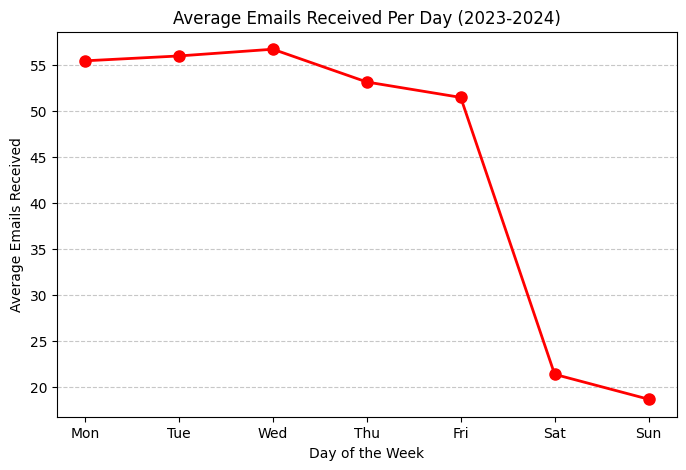

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime


file_path = "unfiltered-2023-24.csv"
df = pd.read_csv(file_path, sep=";")


email_counts = df["day"].value_counts()

day_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
email_counts = email_counts.reindex(day_order)

email_counts = email_counts / 104

average_emails = email_counts.mean()
variance_emails = email_counts.var()
email_range = email_counts.max() - email_counts.min()


print(email_counts)
print(f"Average Emails per Day: {average_emails:.2f}")
print(f"Variance: {variance_emails:.2f}")
print(f"Range: {email_range}\n")

plt.figure(figsize=(8, 5))
email_counts.plot(kind="line", marker="o", linestyle="-", color="red", linewidth=2, markersize=8)
plt.xlabel("Day of the Week")
plt.ylabel("Average Emails Received")
plt.title("Average Emails Received Per Day (2023-2024)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
df = pd.read_csv("unfiltered-2023-24.csv", delimiter=";")
df.columns = [col.strip() for col in df.columns]
df = df[df['year'].isin([2023, 2024])]
def get_weekday(row):
    try:
        return datetime.strptime(f"{row['year']} {row['month']} {row['date']}", "%Y %b %d").strftime("%a")
    except ValueError:
        return row['day']

df['day'] = df.apply(get_weekday, axis=1)
w_counts = df.groupby(['year', 'month', 'date', 'day']).size().reset_index(name='email_count')
w_avg = w_counts.groupby('day')['email_count'].mean()
w_std = w_counts.groupby('day')['email_count'].std()
week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
w_avg = w_avg.reindex(week_order)
w_std = w_std.reindex(week_order)
print("\ndaywise standard deviation of emails received:")
print(w_std)



daywise standard deviation of emails received:
day
Mon    41.154754
Tue    36.129075
Wed    43.021626
Thu    30.990705
Fri    42.800277
Sat    43.224736
Sun    28.615188
Name: email_count, dtype: float64


## 1(4)

In [20]:

file_path = "filtered-2012-24.csv"
df1 = pd.read_csv(file_path, sep=";")


In [21]:
unfiltered_path = "unfiltered-2023-24.csv"
filtered_path = "filtered-2012-24.csv"

unfiltered_data = pd.read_csv(unfiltered_path, delimiter=";")
filtered_data = pd.read_csv(filtered_path, delimiter=";")

filtered_data["year"] = pd.to_numeric(filtered_data["year"], errors="coerce")

filtered_recent = filtered_data[filtered_data["year"].isin([2023, 2024])]

total_emails_unfiltered = len(unfiltered_data)
total_emails_filtered_recent = len(filtered_recent)

deleted_emails_corrected = total_emails_unfiltered - total_emails_filtered_recent


deletion_fraction_corrected = deleted_emails_corrected / total_emails_unfiltered


delete_stats = pd.DataFrame({
    "Total Emails Received (2023-2024)": [total_emails_unfiltered] ,
    "Total Emails Kept (2023-2024)": [total_emails_filtered_recent],
    "Total Emails Deleted (2023-2024)": [deleted_emails_corrected],
    "Fraction of Emails Deleted": [deletion_fraction_corrected ]
})


print("Final Email Deletion Statistics:")
print(delete_stats.to_string(index=False))

Final Email Deletion Statistics:
 Total Emails Received (2023-2024)  Total Emails Kept (2023-2024)  Total Emails Deleted (2023-2024)  Fraction of Emails Deleted
                             32691                          12458                             20233                    0.618917


## 1(5)

In [22]:
unfiltered_path = "unfiltered-2023-24.csv"
filtered_path = "filtered-2012-24.csv"

unfiltered_df = pd.read_csv(unfiltered_path, delimiter=";")
filtered_df = pd.read_csv(filtered_path, delimiter=";")


unfiltered_df["year"] = pd.to_numeric(unfiltered_df["year"], errors="coerce")
filtered_df["year"] = pd.to_numeric(filtered_df["year"], errors="coerce")

unfiltered_df = unfiltered_df[unfiltered_df["year"].isin([2023, 2024, 2025])]
filtered_df = filtered_df[filtered_df["year"].isin([2023, 2024, 2025])]


unfiltered_df["html"] = pd.to_numeric(unfiltered_df["html"], errors="coerce").fillna(0).astype(int)
filtered_df["html"] = pd.to_numeric(filtered_df["html"], errors="coerce").fillna(0).astype(int)


total_html_unfiltered = unfiltered_df[unfiltered_df["html"] == 1].shape[0]
total_non_html_unfiltered = unfiltered_df[unfiltered_df["html"] == 0].shape[0]


filtered_html = filtered_df[filtered_df["html"] == 1].shape[0]
filtered_non_html = filtered_df[filtered_df["html"] == 0].shape[0]


deleted_html = total_html_unfiltered - filtered_html
deleted_non_html = total_non_html_unfiltered - filtered_non_html


html_deletion_rate = deleted_html / total_html_unfiltered if total_html_unfiltered > 0 else 0
non_html_deletion_rate = deleted_non_html / total_non_html_unfiltered if total_non_html_unfiltered > 0 else 0


print(f"Deletion rate for HTML emails: {html_deletion_rate:.2%}")
print(f"Deletion rate for Non-HTML emails: {non_html_deletion_rate:.2%}")


if html_deletion_rate > non_html_deletion_rate:
    print("Emails with HTML content are more likely to be deleted.")
elif html_deletion_rate < non_html_deletion_rate:
    print("Emails without HTML content are more likely to be deleted.")
else:
    print("Both types of emails are deleted at the same rate.")


Deletion rate for HTML emails: 58.22%
Deletion rate for Non-HTML emails: 71.80%
Emails without HTML content are more likely to be deleted.


## 1(6)

In [23]:
unfiltered_df["year"] = pd.to_numeric(unfiltered_df["year"], errors="coerce")
filtered_df["year"] = pd.to_numeric(filtered_df["year"], errors="coerce")

unfiltered_df = unfiltered_df[unfiltered_df["year"].isin([2023, 2024, 2025])]
filtered_df = filtered_df[filtered_df["year"].isin([2023, 2024, 2025])]

attachment_cols = ["pdf", "doc", "ppt", "image"]

for col in attachment_cols:
    unfiltered_df[col] = pd.to_numeric(unfiltered_df[col], errors="coerce").fillna(0).astype(int)
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors="coerce").fillna(0).astype(int)

unfiltered_df["has_attachment"] = unfiltered_df[attachment_cols].sum(axis=1) > 0
filtered_df["has_attachment"] = filtered_df[attachment_cols].sum(axis=1) > 0


total_with_attachment = unfiltered_df[unfiltered_df["has_attachment"]].shape[0]
total_without_attachment = unfiltered_df[~unfiltered_df["has_attachment"]].shape[0]


filtered_with_attachment = filtered_df[filtered_df["has_attachment"]].shape[0]
filtered_without_attachment = filtered_df[~filtered_df["has_attachment"]].shape[0]


deleted_with_attachment = total_with_attachment - filtered_with_attachment
deleted_without_attachment = total_without_attachment - filtered_without_attachment


with_attachment_deletion_rate = deleted_with_attachment / total_with_attachment if total_with_attachment > 0 else 0
without_attachment_deletion_rate = deleted_without_attachment / total_without_attachment if total_without_attachment > 0 else 0


print(f"Deletion rate for emails WITH attachments: {with_attachment_deletion_rate:.2%}")
print(f"Deletion rate for emails WITHOUT attachments: {without_attachment_deletion_rate:.2%}")


if with_attachment_deletion_rate > without_attachment_deletion_rate:
    print("Emails with attachments are more likely to be deleted.")
elif with_attachment_deletion_rate < without_attachment_deletion_rate:
    print("Emails without attachments are more likely to be deleted.")
else:
    print("Both types of emails are deleted at the same rate.")


Deletion rate for emails WITH attachments: 37.98%
Deletion rate for emails WITHOUT attachments: 63.93%
Emails without attachments are more likely to be deleted.


## 1(7)

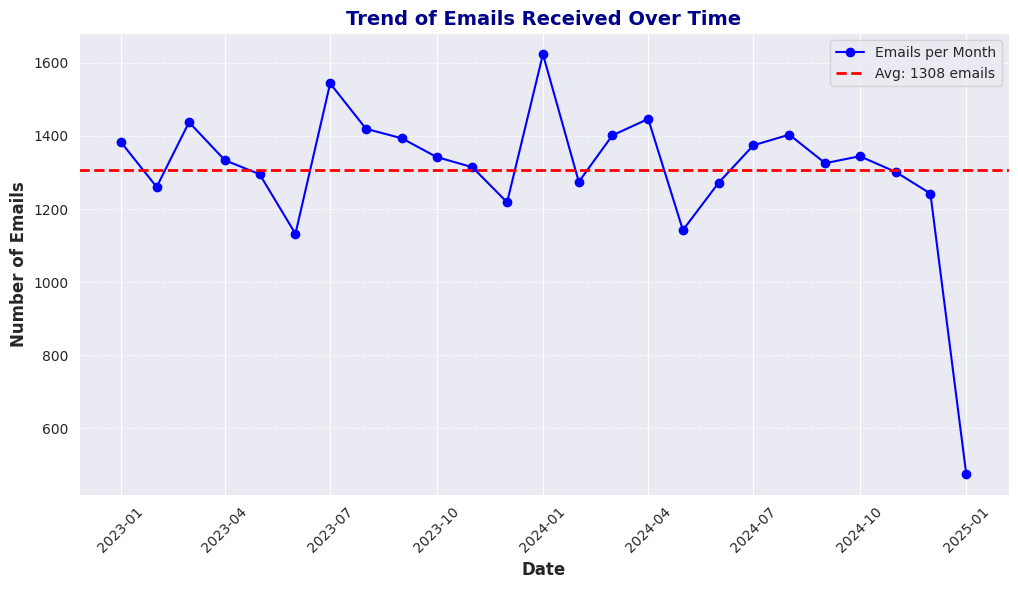

In [32]:
data_table3 = pd.read_csv("unfiltered-2023-24.csv", delimiter=';')

data_table3.columns = [name.strip() for name in data_table3.columns]

month_numbers_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
data_table3["month"] = data_table3["month"].map(month_numbers_map)
data_table3["day"] = pd.to_numeric(data_table3["date"], errors='coerce')
data_table3["year"] = pd.to_numeric(data_table3["year"], errors='coerce')

data_table3["full_datetime"] = pd.to_datetime(data_table3[["year", "month", "day"]], errors='coerce')

data_table3_monthly = data_table3.groupby(data_table3["full_datetime"].dt.to_period("M")).size().reset_index(name="email_total")

data_table3_monthly["full_datetime"] = data_table3_monthly["full_datetime"].astype(str) + "-01"
data_table3_monthly["full_datetime"] = pd.to_datetime(data_table3_monthly["full_datetime"])
plt.figure(figsize=(12, 6))
plt.plot(data_table3_monthly["full_datetime"], data_table3_monthly["email_total"], marker='o', linestyle='-', color='b', label="Emails per Month")

plt.axhline(y=data_table3_monthly["email_total"].mean(), color='r', linestyle='dashed', linewidth=2, label=f'Avg: {data_table3_monthly["email_total"].mean():.0f} emails')

plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Number of Emails", fontsize=12, fontweight="bold")
plt.title("Trend of Emails Received Over Time", fontsize=14, fontweight="bold", color="darkblue")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 1(8)

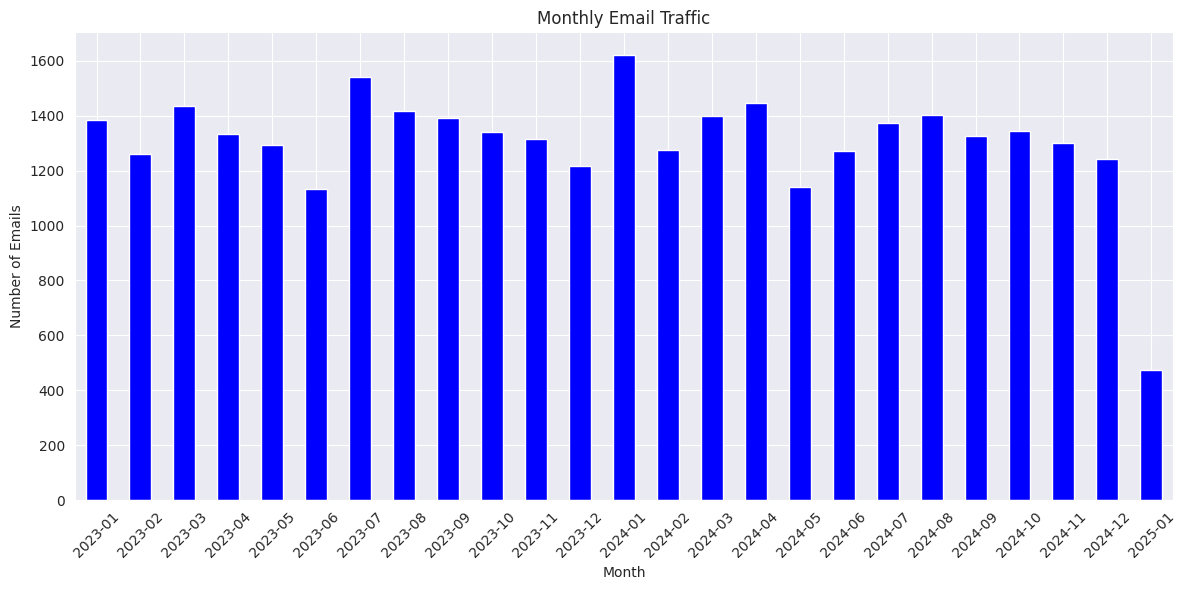

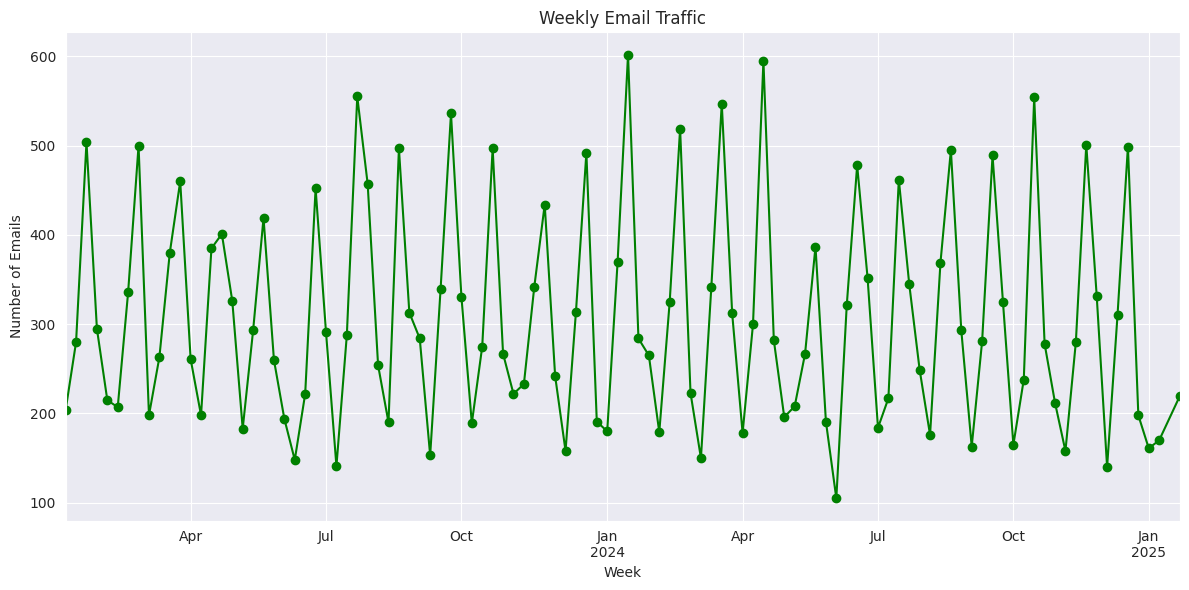

The month with the highest email traffic is: 2024-01 with 1623 emails.
The week with the highest email traffic is: 2024-01-15/2024-01-21 with 602 emails.


In [31]:
data_table2 = pd.read_csv('unfiltered-2023-24.csv', delimiter=';')
month_numbers = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

data_table2.rename(columns={'date': 'day_index'}, inplace=True)
data_table2['month_num'] = data_table2['month'].map(month_numbers)
data_table2['hour'] = data_table2['time'].str[:2].astype(int)
data_table2['minute'] = data_table2['time'].str[3:5].astype(int)
data_table2['second'] = data_table2['time'].str[6:8].astype(int)
data_table2['full_datetime'] = pd.to_datetime({
    'year': data_table2['year'],
    'month': data_table2['month_num'],
    'day': data_table2['day_index'],
    'hour': data_table2['hour'],
    'minute': data_table2['minute'],
    'second': data_table2['second']
})

monthly_email_totals = data_table2.groupby(data_table2['full_datetime'].dt.to_period('M')).size()
weekly_email_totals = data_table2.groupby(data_table2['full_datetime'].dt.to_period('W')).size()
plt.figure(figsize=(12, 6))
monthly_email_totals.plot(kind='bar', color='blue')
plt.title('Monthly Email Traffic')
plt.xlabel('Month')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
weekly_email_totals.plot(kind='line', marker='o', color='green')
plt.title('Weekly Email Traffic')
plt.xlabel('Week')
plt.ylabel('Number of Emails')
plt.tight_layout()
plt.show()

busiest_month = monthly_email_totals.idxmax()
busiest_month_emails = monthly_email_totals.max()
busiest_week = weekly_email_totals.idxmax()
busiest_week_emails = weekly_email_totals.max()
print(f"The month with the highest email traffic is: {busiest_month} with {busiest_month_emails} emails.")
print(f"The week with the highest email traffic is: {busiest_week} with {busiest_week_emails} emails.")


## 1(9)

R Forest Model Mean Absolute Error: 9.88
Predicted emails on the coming Monday: 45
Predicted emails in the coming week (Monday-Sunday): 255


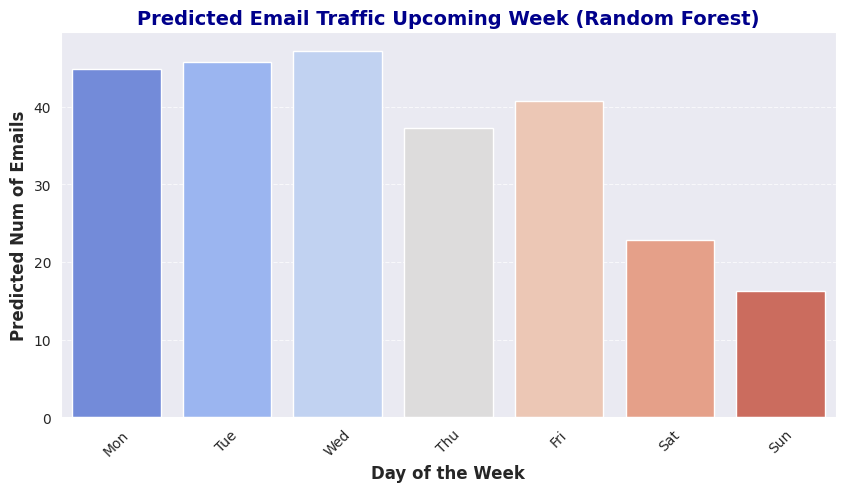

In [30]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'unfiltered-2023-24.csv'
data_table = pd.read_csv(data_file, delimiter=';')

data_table.columns = [name.strip() for name in data_table.columns]

month_numbers = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

if data_table['month'].dtype == 'object':
    data_table['month'] = data_table['month'].map(month_numbers)

data_table['week_num'] = data_table['date'] // 7 + 1
data_table['year_week_num'] = data_table['year'].astype(str) + '-' + data_table['week_num'].astype(str).str.zfill(2)

days_of_week = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
if 'day' not in data_table.columns:
    data_table['day'] = (data_table['date'] % 7).map(days_of_week)

day_counts = data_table.groupby(['year', 'month', 'week_num', 'day']).size().reset_index(name='email_total')

day_to_number = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
day_counts['day_index'] = day_counts['day'].map(day_to_number)

X = day_counts[['year', 'month', 'week_num', 'day_index']]
y = day_counts['email_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

email_model = RandomForestRegressor(n_estimators=200, random_state=42)
email_model.fit(X_train, y_train)

y_guess = email_model.predict(X_test)
error_rate = mean_absolute_error(y_test, y_guess)
print(f"R Forest Model Mean Absolute Error: {error_rate:.2f}")

upcoming_monday = pd.DataFrame({'year': [2025], 'month': [2], 'week_num': [6], 'day_index': [0]})
predicted_monday = email_model.predict(upcoming_monday)[0]

full_week = pd.DataFrame({'year': [2025]*7, 'month': [2]*7, 'week_num': [6]*7, 'day_index': list(range(7))})
predicted_week = email_model.predict(full_week)
total_predicted_week = predicted_week.sum()

print(f"Predicted emails on the coming Monday: {round(predicted_monday)}")
print(f"Predicted emails in the coming week (Monday-Sunday): {round(total_predicted_week)}")

plt.figure(figsize=(10, 5))
sns.barplot(x=list(day_to_number.keys()), y=predicted_week, palette='coolwarm')
plt.xlabel('Day of the Week', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Num of Emails', fontsize=12, fontweight='bold')
plt.title('Predicted Email Traffic Upcoming Week (Random Forest)', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
